# PROJECT UAS DATA MINING DAN DATA WAREHOUSE

Kelompok 1

Anggota :

- 2210511046 - Hanifah Azzahra
- 2210511052 - Widya Amellia Putri
- 2210511056 - Adinda Rizki Sya'bana Diva
- 2210511068 - Muhammad Nur Alam
- 2210511075 - Kemas Alauddin Riayat Syah Indrakusuma
- 2210511084 - Dzulfikri Adjmal

## Data Wrangling

### Gathering & Assesing Data

In [3]:
# Support Libraries
import pandas as pd
import math
from six import StringIO
import pydotplus
import os
import shutil

# Classification and Clustering Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('./Dataset/Airline-Passenger-Satisfaction/train.csv', index_col=0)
df_test = pd.read_csv('./Dataset/Airline-Passenger-Satisfaction/test.csv', index_col=0)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int64  


In [6]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
df_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [8]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
df_test.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


### Data Cleaning

Membersihkan missing value dan menghapus kolom indeks pada data, kemudian disimpan ke file `.csv`

Melihat total jumlah missing value di setiap kolom

In [10]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [11]:
df_test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

Membersihkan Missing Value

In [12]:
df_cleaned = df.dropna()

In [13]:
df_cleaned_test = df_test.dropna()

In [14]:
df_cleaned.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [15]:
df_cleaned_test.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Menghapus Kolom index

In [16]:
df_cleaned = df_cleaned.reset_index(drop=True)

In [17]:
df_cleaned_test = df_cleaned_test.reset_index(drop=True)

Data Yang Sudah Dibersihkan

In [18]:
df_cleaned.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [19]:
df_cleaned_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [20]:
df_cleaned.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,64942.428625,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,37460.816597,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32562.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64890.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97370.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [21]:
df_cleaned_test.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000
mean,65021.974858,39.621983,1193.753254,2.723709,3.046422,2.755996,2.976442,3.214923,3.261615,3.448886,3.356969,3.385587,3.349786,3.632681,3.313907,3.648824,3.285521,14.225080,14.740857
std,37606.098635,15.134224,998.626779,1.334711,1.532971,1.412552,1.281661,1.331895,1.355505,1.320254,1.338643,1.282033,1.319045,1.176220,1.269138,1.180650,1.319355,37.185919,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32209.000000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,65344.000000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97623.000000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000


Menggabungkan dataframe

In [22]:
df_merge = pd.concat([df_cleaned, df_cleaned_test], ignore_index=True)
df_merge.shape

(129487, 24)

Menyimpan dataframe yang sudah digabung ke dalam file `.csv`

In [23]:
output_file_path = './Dataset/Airline-Passenger-Satisfaction/merge_cleaned_data.csv'
df_merge.to_csv(output_file_path, index=False)

## EDA (Exploratory Data Analysis)

### Pertanyaan Analisis

- Layanan apa yang memberikan kepuasan penumpang tertinggi?
- Berapa rata-rata penilaian pelanggan untuk semua layanan?
- Bagaimana perbandingan tingkat kepuasan penumpang antara kelas?
- Apakah keterlambatan keberangkatan dan kedatangan memiliki pengaruh terhadap kepuasan penumpang?
- Bagaimana perbandingan hasil antara algoritma klasifikasi Naive Bayes, k-NN, dan Decision Tree?

### Tujuan

1. Mengidentifikasi layanan spesifik yang paling berkontribusi terhadap kepuasan penumpang dengan menganalisis korelasi antara berbagai aspek layanan dan tingkat kepuasan.
2. Menghitung nilai rata-rata dari seluruh layanan yang tersedia dalam dataset untuk memperoleh gambaran umum tentang kepuasan penumpang.
3. Melakukan perbandingan secara langsung antara kepuasan penumpang dari kelas personal dan business untuk mengetahui apakah terdapat perbedaan signifikan dalam pengalaman penumpang di kedua kelas tersebut.
4. Melakukan analisis statistik untuk menentukan apakah terdapat hubungan antara tingkat kepuasan penumpang dengan tingkat keterlambatan keberangkatan dan kedatangan.
5. Menggunakan 3 teknik klasifikasi untuk membedakan penumpang berdasarkan tipe penumpang dan tingkat kepuasan yang mereka berikan terhadap layanan, serta membandingkan performa dari algoritma tersebut.

### Eksplorasi Data

Menemukan pola hubungan antar kolom dan mengubah kolom kategorikal menjadi numerik untuk digunakan pada proses selanjutnya.

Melihat data yang sudah dibersihkan

In [24]:
df_merge

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129483,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129484,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129485,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


Menampilkan beberapa baris pertama dari dataset

In [25]:
df_merge.head()

       id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0         

Statistik deskriptif untuk data numerik

In [26]:
df_merge.describe()

                  id            Age  Flight Distance  Inflight wifi service  \
count  129487.000000  129487.000000    129487.000000          129487.000000   
mean    64958.335169      39.428761      1190.210662               2.728544   
std     37489.781165      15.117597       997.560954               1.329235   
min         1.000000       7.000000        31.000000               0.000000   
25%     32494.500000      27.000000       414.000000               2.000000   
50%     64972.000000      40.000000       844.000000               3.000000   
75%     97415.500000      51.000000      1744.000000               4.000000   
max    129880.000000      85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      129487.000000           129487.000000   
mean                            3.057349                2.756786   
std                             1.526787                1.401662   
min             

1. Layanan yang memberikan kepuasan paling tinggi

In [ ]:
df_service = df_merge.iloc[:, 7:21]
df_service.mean().round(2)

In [ ]:
# print service and the highest mean
print('Service with the highest mean:')
print(df_service.mean().round(2).idxmax())
print('Mean: ', df_service.mean().round(2).max())

# print service and the lowest mean
print('\nService with the lowest mean:')
print(df_service.mean().round(2).idxmin())
print('Mean: ', df_service.mean().round(2).min())

2. Rata-rata penilaian pelanggan untuk semua layanan

In [ ]:
df_AllAverage = df_merge.iloc[:, 7:21]
df_AllAverage['Average'] = df_AllAverage.mean(axis=1)
df_AllAverage

In [ ]:
print("Rata-rata keseluruhan:", df_AllAverage['Average'].mean())

3. Perbandingan tingkat kepuasan penumpang antar kelas

In [ ]:
df_avg_class_satisfaction =df_merge.iloc[:,[5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]].groupby('Class').mean()
df_avg_class_satisfaction

In [ ]:
df_avg_class_satisfaction.mean(axis=1)

Mengubah kolom kategorikal menjadi numerik menggunakan LabelEncoder dari Scikit-learn

In [27]:
label_encoder = LabelEncoder()
df_merge_encoded = df_merge.copy()
categorical_columns = df_merge_encoded.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
    df_merge_encoded[col] = label_encoder.fit_transform(df_merge_encoded[col])

Menampilkan hasil transformasi kolom kategorikal menjadi numerik

In [28]:
df_merge_encoded.head()

       id  Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0   70172       1              0   13               1      2              460   
1    5047       1              1   25               0      0              235   
2  110028       0              0   26               0      0             1142   
3   24026       0              0   25               0      0              562   
4  119299       1              0   61               0      0              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5    

Mencari korelasi antar kolom numerik

In [29]:
correlation_matrix = df_merge_encoded.corr()
print("Matriks Korelasi:")
correlation_matrix


Matriks Korelasi:


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,1.000000,-0.001027,0.001359,0.020443,-0.000734,-0.104469,0.095027,-0.023242,-0.002056,0.013247,...,0.001944,0.055454,0.043914,0.074618,0.079154,0.078838,0.024425,-0.017506,-0.035657,0.012990
Gender,-0.001027,1.000000,-0.030803,0.008984,0.009215,-0.011655,0.003836,0.005968,0.008772,0.006129,...,0.003798,0.006441,0.031031,0.036414,0.008392,0.038176,0.002818,0.003111,0.001309,0.011496
Customer Type,0.001359,-0.030803,1.000000,-0.284275,-0.308210,0.042959,-0.226134,-0.005884,-0.206916,-0.018183,...,-0.106157,-0.054040,-0.046885,0.025015,-0.031258,0.023567,-0.081433,0.004131,0.004730,-0.185925
Age,0.020443,0.008984,-0.284275,1.000000,-0.044910,-0.116967,0.099863,0.015779,0.036780,0.022294,...,0.074990,0.056743,0.038992,-0.048192,0.033182,-0.051778,0.052575,-0.009263,-0.011248,0.134001
Type of Travel,-0.000734,0.009215,-0.308210,-0.044910,1.000000,0.486598,-0.267064,-0.105574,0.257208,-0.133891,...,-0.152708,-0.059700,-0.139540,-0.032921,0.016530,-0.023417,-0.084257,-0.006336,-0.005830,-0.449794
Class,-0.104469,-0.011655,0.042959,-0.116967,0.486598,1.000000,-0.427144,-0.024912,0.087185,-0.094989,...,-0.183178,-0.210748,-0.198828,-0.166507,-0.157380,-0.159110,-0.129715,0.009553,0.014162,-0.448338
Flight Distance,0.095027,0.003836,-0.226134,0.099863,-0.267064,-0.427144,1.000000,0.006554,-0.018901,0.064959,...,0.130518,0.111224,0.134548,0.064810,0.073635,0.059182,0.095658,0.001992,-0.001935,0.298206
Inflight wifi service,-0.023242,0.005968,-0.005884,0.015779,-0.105574,-0.024912,0.006554,1.000000,0.344846,0.714888,...,0.207887,0.120028,0.160414,0.120548,0.043847,0.110300,0.131163,-0.016046,-0.017749,0.283291
Departure/Arrival time convenient,-0.002056,0.008772,-0.206916,0.036780,0.257208,0.087185,-0.018901,0.344846,1.000000,0.437697,...,-0.008189,0.067046,0.010634,0.070646,0.091217,0.072166,0.010021,0.000610,-0.000942,-0.054457
Ease of Online booking,0.013247,0.006129,-0.018183,0.022294,-0.133891,-0.094989,0.064959,0.714888,0.437697,1.000000,...,0.046669,0.039039,0.109341,0.039215,0.008835,0.035356,0.015150,-0.005330,-0.007033,0.168704


Menyimpan data yang telah diubah

In [30]:
output_file_path = './Dataset/Airline-Passenger-Satisfaction/hasil_eksplorasi_data.csv'
df_merge_encoded.to_csv(output_file_path, index=False)

Melihat data yang telah diubah

In [31]:
df_merge_encoded

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,78463,1,1,34,0,0,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,0
129483,71167,1,0,23,0,0,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
129484,37675,0,0,17,1,1,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,0
129485,90086,1,0,14,0,0,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


In [32]:
df_merge_encoded['satisfaction'].value_counts()

satisfaction
0    73225
1    56262
Name: count, dtype: int64

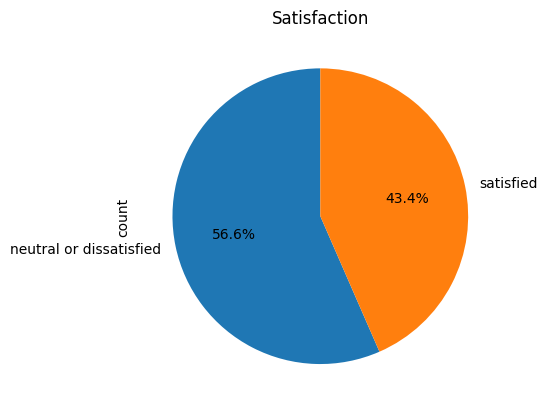

In [33]:
df_merge['satisfaction'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Satisfaction')
plt.show()

In [34]:
df_merge_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129487 non-null  int64  
 1   Gender                             129487 non-null  int32  
 2   Customer Type                      129487 non-null  int32  
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  int32  
 5   Class                              129487 non-null  int32  
 6   Flight Distance                    129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Ease of Online booking             129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Food and drink                     1294

Berdasarkan hasil data tersebut, label kepuasan pelanggan terhadap layanan penerbangan, terbagi menjadi 2 kategori. Kategori ```satisfied``` memiliki persentase lebih sedikit dari kategori ```neutral or dissatisfied```, tetapi persentase 56.6% tersebut terbagi menjadi dua kategori netral dan tidak puas yang hitungannya lebih kecil dari persentase puas secara penuh sehingga pelanggan cukup puas dan menikmati layanan penerbangan yang disediakan.

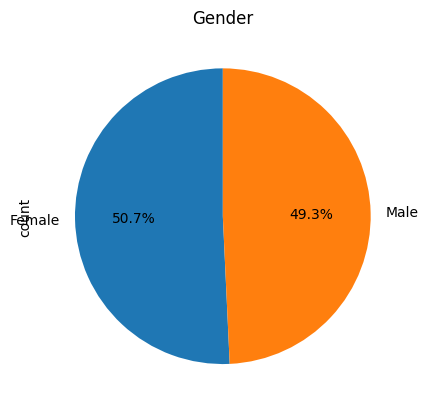

In [35]:
df_merge['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Gender')
plt.show()

Kumpulan data tersebut menunjukkan distribusi kepuasan penumpang yang secara umum seimbang antar gender, dengan jumlah penumpang perempuan sedikit lebih banyak dibandingkan laki-laki. Kepuasan penumpang cukup merata antar gender, dengan proporsi individu yang puas sedikit lebih tinggi baik pada kelompok pria maupun wanita. Temuan ini menyoroti keterwakilan penumpang laki-laki dan perempuan yang relatif setara, dengan jumlah penumpang perempuan yang sedikit lebih tinggi.

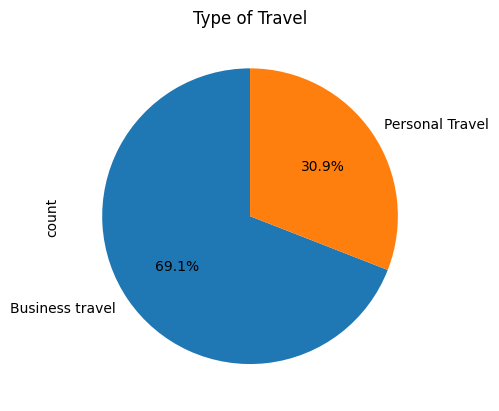

In [36]:
df_merge['Type of Travel'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Type of Travel')
plt.show()

In [37]:
df_travel = df_merge.groupby(['Type of Travel', 'satisfaction']).agg({'satisfaction': 'count'}).rename(columns={'satisfaction': 'Jumlah'})
df_travel.reset_index(inplace=True)
df_travel

,Type of Travel,satisfaction,Jumlah
0,Business travel,neutral or dissatisfied,37238
1,Business travel,satisfied,52207
2,Personal Travel,neutral or dissatisfied,35987
3,Personal Travel,satisfied,4055


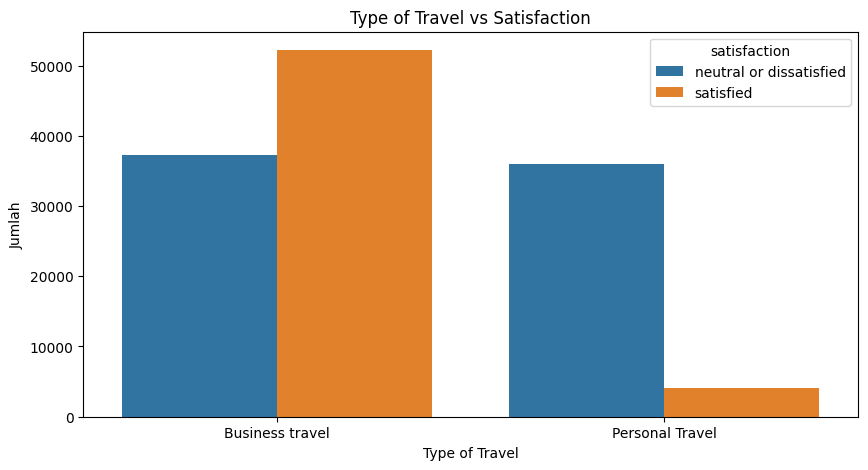

In [38]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Type of Travel', y='Jumlah', hue='satisfaction', data=df_travel)
plt.title('Type of Travel vs Satisfaction')
plt.show()

Jika dilihat dari tipe perjalanan yang dipilih oleh penumpang, persentase banyaknya penumpang yang paling besar yaitu tipe perjalanan bisnis. Jika dikaitkan dengan tingkat kepuasan, dapat diperoleh penumpang dengan perjalanan bisnis lebih dominan menyatakan label satisfication dan penumpang dengan perjalanan personal dominan menyatakan kepuasan label neutral or dissatisfaction. Dapat disimpulkan bahwa tipe perjalanan business dengan fasilitas yang lebih dapat mempengaruhi kepuasan pelanggan.

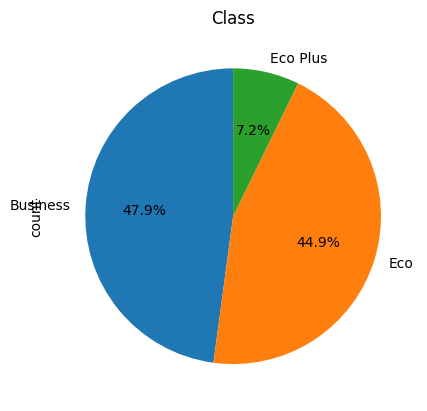

In [39]:
df_merge['Class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Class')
plt.show()

In [40]:
df_class = df_merge.groupby(['Class', 'satisfaction']).agg({'satisfaction': 'count'}).rename(columns={'satisfaction': 'Jumlah'})
df_class.reset_index(inplace=True)
df_class

,Class,satisfaction,Jumlah
0,Business,neutral or dissatisfied,18940
1,Business,satisfied,43050
2,Eco,neutral or dissatisfied,47215
3,Eco,satisfied,10902
4,Eco Plus,neutral or dissatisfied,7070
5,Eco Plus,satisfied,2310


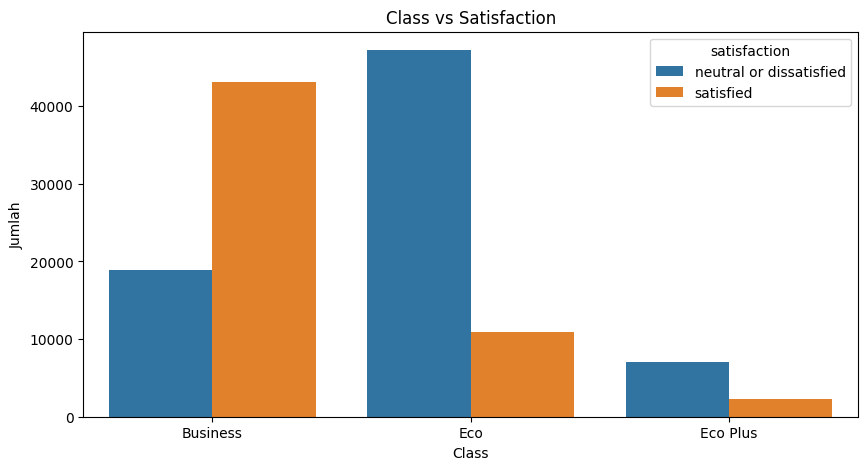

In [41]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Class', y='Jumlah', hue='satisfaction', data=df_class)
plt.title('Class vs Satisfaction')
plt.show()

Berdasarkan data di atas, dihasilkan bahwa jumlah penumpang pada class kategori business menggambarkan jumlah terbesar dengan label kepuasan satisfied, sedangkan jumlah penumpang pada urutan kedua masuk ke dalam class kategori eco dengan dominan label kepuasan neutral or dissatisfied, dan pada class kategori eco plus memiliki jumlah penumpang terkecil dengan tingkat kepuasan neutral or dissatisfied lebih besar. Dapat disimpulkan class penerbangan dapat mempengaruhi tingkat kepuasan.

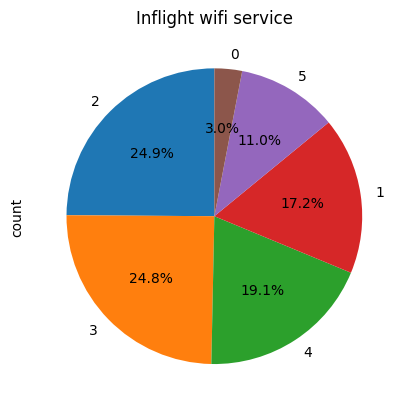

In [42]:
df_merge_encoded['Inflight wifi service'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Inflight wifi service')
plt.show()

In [43]:
df_inflight = df_merge.groupby(['Class', 'Inflight wifi service', 'satisfaction']).agg({'satisfaction': 'count'}).rename(columns={'satisfaction': 'Jumlah'})
df_inflight.reset_index(inplace=True)
df_inflight

,Class,Inflight wifi service,satisfaction,Jumlah
0,Business,0,satisfied,2487
1,Business,1,neutral or dissatisfied,3964
2,Business,1,satisfied,7299
3,Business,2,neutral or dissatisfied,6230
4,Business,2,satisfied,7569
5,Business,3,neutral or dissatisfied,6014
6,Business,3,satisfied,7565
7,Business,4,neutral or dissatisfied,2637
8,Business,4,satisfied,9208
9,Business,5,neutral or dissatisfied,95


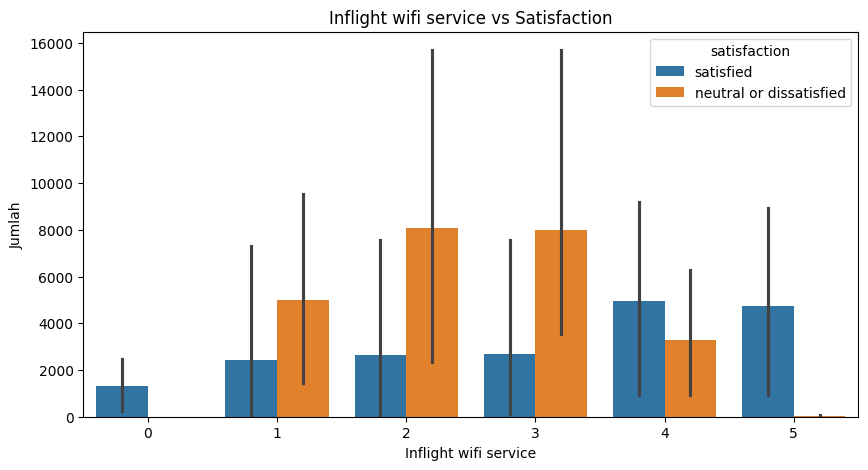

In [44]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Inflight wifi service', y='Jumlah', hue='satisfaction', data=df_inflight)
plt.title('Inflight wifi service vs Satisfaction')
plt.show()

Berdasarkan data di atas, layanan inflight wifi mendapat penilaian kepuasan pelanggan dengan skala 2 dari 5 paling banyak dari keseluruhan data penumpang sebesar 24.9%. Secara rincian penyumbang penilaian `satisfied` didominasi oleh pelanggan class business menunjukkan bahwa class penumpang mempengaruhi kualitas penyediaan layanan.

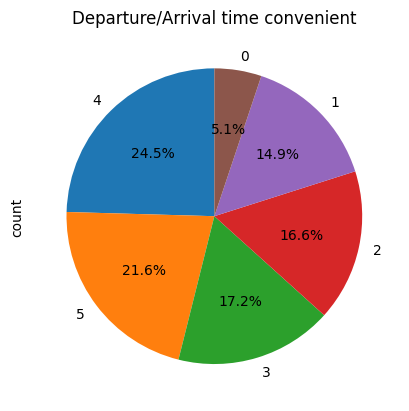

In [45]:
df_merge_encoded['Departure/Arrival time convenient'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Departure/Arrival time convenient')
plt.show()

Berdasarkan data di atas, layanan departure/arrival time convenient mendapat penilaian kepuasan pelanggan dengan skala 4 dari 5 paling banyak dari keseluruhan data penumpang sebesar 24.5%. Dapat disimpulkan bahwa layanan ini cukup memberikan pelayanan yang baik.

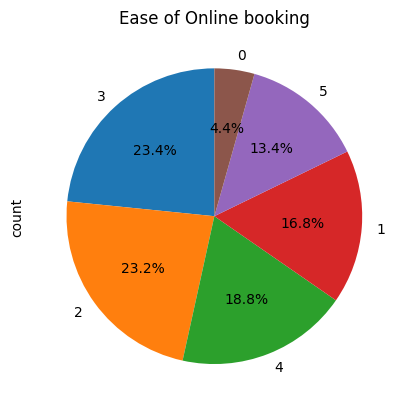

In [46]:
df_merge_encoded['Ease of Online booking'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Ease of Online booking')
plt.show()

Berdasarkan data di atas, layanan ease of online booking mendapat penilaian kepuasan pelanggan dengan skala 3 dari 5 paling banyak dari keseluruhan data penumpang sebesar 23.4%. Dapat disimpulkan bahwa layanan ini cukup memberikan pelayanan yang baik dengan memberikan kemudahan dalam pemesanan tiket via online.

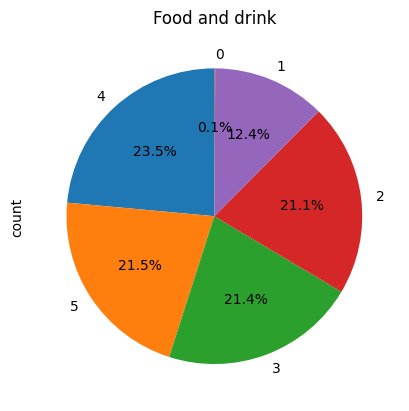

In [47]:
df_merge_encoded['Food and drink'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Food and drink')
plt.show()

In [48]:
df_food = df_merge.groupby(['Class', 'Food and drink', 'satisfaction']).agg({'satisfaction': 'count'}).rename(columns={'satisfaction': 'Jumlah'})
df_food.reset_index(inplace=True)
df_food

,Class,Food and drink,satisfaction,Jumlah
0,Business,0,neutral or dissatisfied,13
1,Business,0,satisfied,24
2,Business,1,neutral or dissatisfied,3521
3,Business,1,satisfied,1839
4,Business,2,neutral or dissatisfied,4450
5,Business,2,satisfied,8736
6,Business,3,neutral or dissatisfied,4437
7,Business,3,satisfied,8970
8,Business,4,neutral or dissatisfied,3531
9,Business,4,satisfied,12008


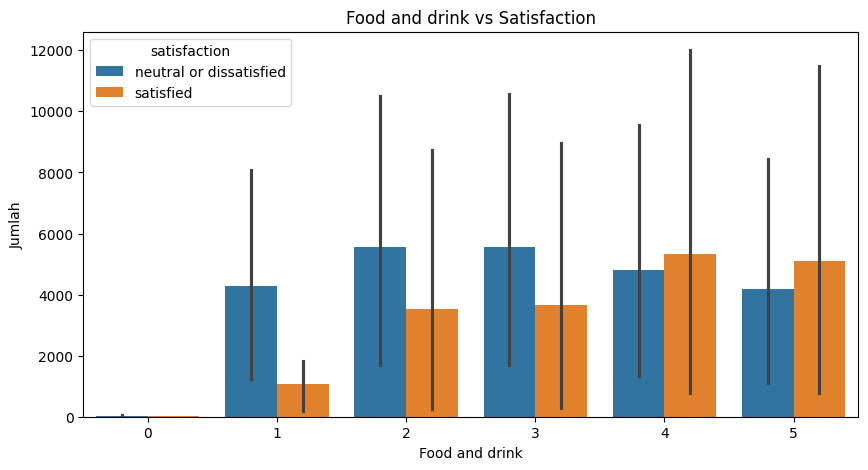

In [49]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Food and drink', y='Jumlah', hue='satisfaction', data=df_food)
plt.title('Food and drink vs Satisfaction')
plt.show()

Berdasarkan data di atas, layanan food and drink mendapat penilaian kepuasan pelanggan dengan skala 4 dari 5 paling banyak dari keseluruhan data penumpang sebesar 23.5%. Dari rincian data di atas, berdasarkan kategori class dapat mempengaruhi kepuasan terhadap makanan dan minuman yang sediakan.

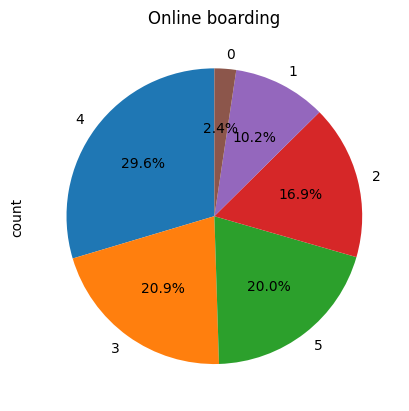

In [50]:
df_merge_encoded['Online boarding'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Online boarding')
plt.show()

Berdasarkan data di atas, layanan online boarding mendapat penilaian kepuasan pelanggan dengan skala 4 dari 5 paling banyak dari keseluruhan data penumpang sebesar 29.6%. Dapat disimpulkan bahwa layanan ini cukup memberikan pelayanan yang baik. 

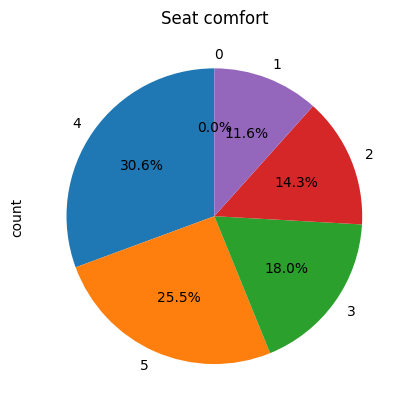

In [51]:
df_merge_encoded['Seat comfort'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Seat comfort')
plt.show()

In [94]:
df_seat = df_merge.groupby(['Seat comfort', 'Class']).size().reset_index(name='Jumlah')

fig_bar_seat = px.bar(df_seat, x='Seat comfort', y='Jumlah', color='Class', title='Seat comfort vs Class', 
                      labels={'Seat comfort': 'Seat Comfort', 'Jumlah': 'Jumlah Penumpang'}, text='Jumlah')
fig_bar_seat.update_layout(width=800, height=500)
fig_bar_seat.show()

Berdasarkan data di atas, layanan seat comfort mendapat penilaian kepuasan pelanggan dengan skala 4 dari 5 paling banyak dari keseluruhan data penumpang sebesar 30.6%. Dengan detail, pada rating 4 dan 5 ditempati oleh class business dan pada rating 4 cukup banyak dibandingkan seluruh rate di semua class. Dapat disimpulkan tempat duduk di semua class cukup nyaman.

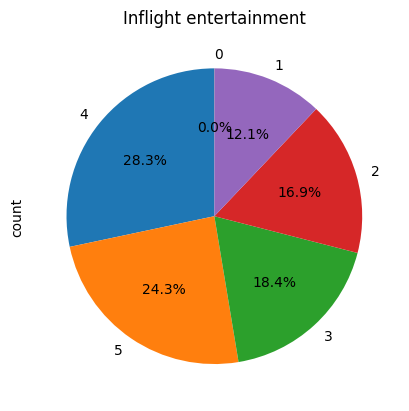

In [101]:
df_merge_encoded['Inflight entertainment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Inflight entertainment')
plt.show()

In [98]:
df_inflight = df_merge.groupby(['Inflight entertainment', 'Class']).size().reset_index(name='Jumlah')

fig_bar_inflight = px.bar(df_inflight, x='Inflight entertainment', y='Jumlah', color='Class', title='Inflight entertainment vs Class', 
                      labels={'Inflight entertainment': 'Inflight entertainment', 'Jumlah': 'Jumlah Penumpang'}, text='Jumlah')
fig_bar_inflight.update_layout(width=800, height=500)
fig_bar_inflight.show()

Berdasarkan data di atas, layanan inflight entertainment mendapat penilaian kepuasan pelanggan dengan skala 4 dari 5 paling banyak dari keseluruhan data penumpang sebesar 28.3%. Dari visualisasi jumlah rating untuk masing-masing class yang tertinggi terdapat di rating 4 yang dapat dikategorikan cukup baik untuk pelayanan ini untuk semua class.

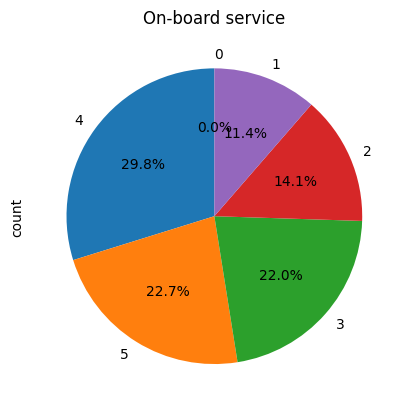

In [ ]:
df_merge_encoded['On-board service'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('On-board service')
plt.show()

In [106]:
df_board = df_merge.groupby(['On-board service', 'Class']).size().reset_index(name='Jumlah')

fig_bar_board = px.bar(df_board, x='On-board service', y='Jumlah', color='Class', title='On-board service vs Class', 
                      labels={'On-board service': 'On-board service', 'Jumlah': 'Jumlah Penumpang'}, text='Jumlah')
fig_bar_board.update_layout(width=800, height=500)
fig_bar_board.show()

Berdasarkan data di atas, layanan on-board service terdapat tren signifikan di mana sebagian besar penumpang menilai layanan dalam kisaran 1 hingga 3 merupakan kelompok class ekonomi yang melaporkan tingkat kepuasan yang lebih rendah. Sedangkan, penumpang dengan rating 4 atau 5 menunjukkan tingkat kepuasan yang lebih tinggi berasal dari class business. Oleh karena itu, dapat disimpulkan untuk pelayanan di dalam pesawat harus ditingkatkan pada class ekonomi.

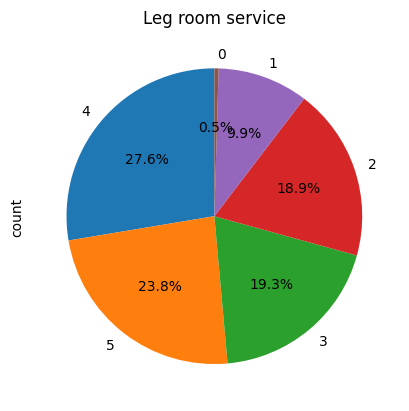

In [ ]:
df_merge_encoded['Leg room service'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Leg room service')
plt.show()

In [122]:
df_legroom = df_merge.groupby(['Leg room service', 'Class']).size().reset_index(name='Jumlah')

fig_bar_legroom = px.bar(df_legroom, x='Leg room service', y='Jumlah', color='Class', title='Leg room vs Class', 
                      labels={'Leg room': 'Leg room', 'Jumlah': 'Jumlah Penumpang'}, text='Jumlah')
fig_bar_legroom.update_layout(width=800, height=500)
fig_bar_legroom.show()

Berdasarkan data di atas, layanan leg room terdapat tren signifikan di mana sebagian besar penumpang menilai layanan dalam kisaran 1 hingga 3 merupakan kelompok class ekonomi yang melaporkan tingkat kepuasan yang lebih tinggi. Sedangkan, penumpang dengan rating 4 atau 5 menunjukkan tingkat kepuasan yang lebih tinggi berasal dari class business. Dapat disimpulkan untuk pelayanan leg room pada class ekonomi masih kurang.

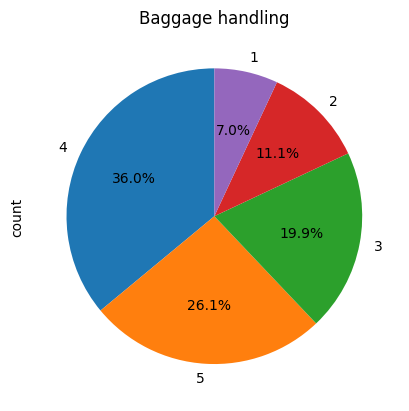

In [ ]:
df_merge_encoded['Baggage handling'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Baggage handling')
plt.show()

In [110]:
df_baggage = df_merge.groupby(['Baggage handling', 'Class']).size().reset_index(name='Jumlah')

fig_bar_baggage = px.bar(df_baggage, x='Baggage handling', y='Jumlah', color='Class', title='Baggage handling vs Class', 
                      labels={'Baggage handling': 'Baggage handling', 'Jumlah': 'Jumlah Penumpang'}, text='Jumlah')
fig_bar_baggage.update_layout(width=800, height=500)
fig_bar_baggage.show()

Berdasarkan data di atas, layanan baggage handling terdapat tren signifikan di mana sebagian besar penumpang menilai layanan dalam kisaran 1 hingga 3 merupakan kelompok class ekonomi yang melaporkan tingkat kepuasan yang lebih tinggi. Sedangkan, penumpang dengan rating 4 atau 5 menunjukkan tingkat kepuasan yang lebih tinggi berasal dari class business. Dapat disimpulkan untuk pelayanan bagasi pada class business cukup baik dan class ekonomi masih kurang maka perlu ditingkatkan.

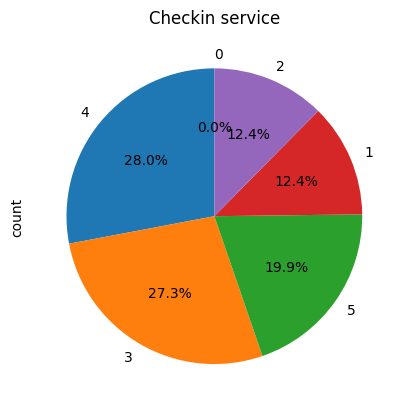

In [ ]:
df_merge_encoded['Checkin service'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Checkin service')
plt.show()

In [111]:
df_checkin = df_merge.groupby(['Checkin service', 'Class']).size().reset_index(name='Jumlah')

fig_bar_checkin = px.bar(df_checkin, x='Checkin service', y='Jumlah', color='Class', title='Checkin service vs Class', 
                      labels={'Checkin service': 'Checkin service', 'Jumlah': 'Jumlah Penumpang'}, text='Jumlah')
fig_bar_checkin.update_layout(width=800, height=500)
fig_bar_checkin.show()

Berdasarkan data di atas, layanan checkin service terdapat tren signifikan di mana sebagian besar penumpang menilai layanan dalam kisaran 1 dan 2 merupakan kelompok class ekonomi yang melaporkan tingkat kepuasan yang lebih tinggi. Sedangkan, penumpang dengan rating 3, 4, dan 5 menunjukkan tingkat kepuasan yang lebih tinggi berasal dari class business. Dapat disimpulkan untuk pelayanan checkin pada penumpang business lebih baik.

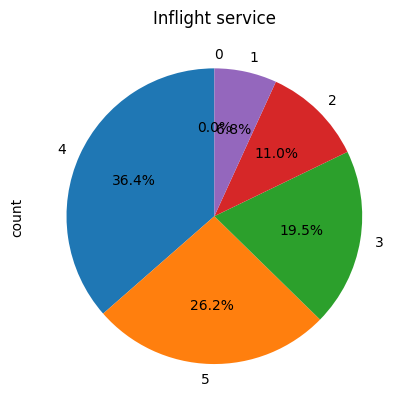

In [118]:
df_merge_encoded['Inflight service'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Inflight service')
plt.show()

In [113]:
df_inflight_service = df_merge.groupby(['Inflight service', 'Class']).size().reset_index(name='Jumlah')

fig_bar_inflight_service = px.bar(df_inflight_service, x='Inflight service', y='Jumlah', color='Class', title='Inflight service vs Class', 
                      labels={'Inflight service': 'Inflight service', 'Jumlah': 'Jumlah Penumpang'}, text='Jumlah')
fig_bar_inflight_service.update_layout(width=800, height=500)
fig_bar_inflight_service.show()

Berdasarkan data di atas, layanan inflight service terdapat tren signifikan di mana sebagian besar penumpang menilai layanan dalam kisaran 1 hingga 3 merupakan kelompok class ekonomi yang melaporkan tingkat kepuasan yang lebih tinggi. Sedangkan, penumpang dengan rating 4 atau 5 menunjukkan tingkat kepuasan yang lebih tinggi berasal dari class business. Dapat disimpulkan untuk pelayanan penerbangan harus ditingkatkan pada class ekonomi.

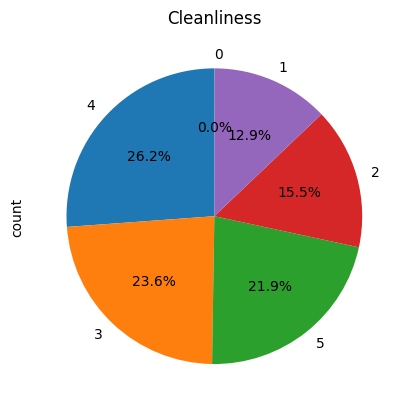

In [ ]:
df_merge_encoded['Cleanliness'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Cleanliness')
plt.show()

In [114]:
df_cleanliness = df_merge.groupby(['Cleanliness', 'Class']).size().reset_index(name='Jumlah')

fig_bar_cleanliness = px.bar(df_cleanliness, x='Cleanliness', y='Jumlah', color='Class', title='Cleanliness vs Class', 
                      labels={'Cleanliness': 'Cleanliness', 'Jumlah': 'Jumlah Penumpang'}, text='Jumlah')
fig_bar_cleanliness.update_layout(width=800, height=500)
fig_bar_cleanliness.show()

Untuk pelayanan kebersihan, penilaian terbesar terdapat pada rating 4 dengan setiap classnya paling banyak menilai dengan rating 4, tetapi untuk rating 1 sampai 3 masih terbilang besar, sehingga diperlukan peningkatan kebersihan pada layanan maskapai guna meningkatkan kenyamanan penumpang. 

### Klasifikasi Naive Bayes - Kemas

Menganalisis data dengan metode klasifikasi menggunakan algoritma `Naive Bayes` dan visualisasi.

In [ ]:
X = df_merge_encoded.drop(['id','satisfaction'], axis=1)
y = df_merge_encoded['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
nbModel = GaussianNB()
nbModel = nbModel.fit(X_train, y_train)
y_pred = nbModel.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[16464,  1827],
       [ 2578, 11503]], dtype=int64)

In [ ]:
y_pred = nbModel.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     18291
           1       0.86      0.82      0.84     14081

    accuracy                           0.86     32372
   macro avg       0.86      0.86      0.86     32372
weighted avg       0.86      0.86      0.86     32372



### Klasifikasi k-NN - Adinda

Menganalisis data dengan metode klustering menggunakan algoritma `k-NN` dan visualisasi.

In [ ]:
X = df_merge_encoded.drop(['id','satisfaction'], axis=1)
y = df_merge_encoded['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Jumlah data training: 97115
Jumlah data testing: 32372


In [ ]:
knn_models = KNeighborsClassifier(n_neighbors=int(math.sqrt(X_train.shape[0])), metric='euclidean')

knn_models.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=311)

In [ ]:
y_pred = knn_models.predict(X_test_scaled)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[17554,   680],
       [ 2271, 11867]], dtype=int64)

In [ ]:
accuracy = accuracy_score(y_test, y_pred).round(2)
precision = precision_score(y_test, y_pred).round(2)
report = classification_report(y_test, y_pred)
print("Accuracy:",accuracy)
print("Precision:",precision)

print(report)

Accuracy: 0.91
Precision: 0.95
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     18234
           1       0.95      0.84      0.89     14138

    accuracy                           0.91     32372
   macro avg       0.92      0.90      0.91     32372
weighted avg       0.91      0.91      0.91     32372



### Decision Tree - Hani

In [ ]:
df_encode = df_merge.iloc[:, 1:23]
label_encoder = LabelEncoder()
listObjectColumn = df_encode.select_dtypes(include=['object']).columns.tolist()
for col in listObjectColumn:
    df_encode[col] = label_encoder.fit_transform(df_encode[col])

df_encode.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [ ]:
treeModel = DecisionTreeClassifier()
X = df_encode
y = df_merge['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


treeModel.fit(X_train, y_train)

y_pred = treeModel.predict(X_test)
y_pred

array(['satisfied', 'satisfied', 'neutral or dissatisfied', ...,
       'satisfied', 'neutral or dissatisfied', 'neutral or dissatisfied'],
      dtype=object)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[17538,   908],
       [  850, 13076]], dtype=int64)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.95
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     18446
              satisfied       0.94      0.94      0.94     13926

               accuracy                           0.95     32372
              macro avg       0.94      0.94      0.94     32372
           weighted avg       0.95      0.95      0.95     32372



In [ ]:
tree_dot = StringIO()
export_graphviz(treeModel, out_file=tree_dot, feature_names=X.columns, class_names=df_merge['satisfaction'].unique().tolist(), rounded=True, filled=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(tree_dot.getvalue())

name_file = './Assets/DecisionTree.dot'

# check if directory exist
if not os.path.exists('./Assets'):
    os.makedirs('./Assets')

with open(name_file, 'w') as png:
    png.write(graph.to_string())


In [ ]:
if shutil.which('dot') is None:
    print("Install Graphviz for Windows: https://graphviz.gitlab.io/_pages/Download/Download_windows.html")
else:
    os.system('dot -Tsvg ./Assets/DecisionTree.dot -o ./Assets/DecisionTree.svg && start \"\" ./Assets/DecisionTree.svg')


# Penjelasan

| Algoritma |Label| Accuracy | Precision | Recall |
|-----------|-----|:--------:|:---------:|:------:|
| Naive Bayes |neutral of dissatisfied| 0.86| 0.82| 0.84|
|  |satisfied| 0.86| 0.82| 0.84|
| k-NN |neutral of dissatisfied| 0.91 | 0.89| 0.96|
|  |satisfied| 0.91| 0.94| 0.84|
| Decision Tree |neutral of dissatisfied| 0.95 | 0.95 | 0.95 |
|  |satisfied| 0.95| 0.93| 0.94|

